In [2]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
from random import randrange
# from torchsummary import summary

In [3]:
epochs = 100
batch_size = 128
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Set up Transformations (0-1 Scaling only)

trainset = torch.load('../data/dataset.pt')
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [25]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 5, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 16, 5, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 8, 5, stride=1, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 5, stride=1, padding=1), 
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 32, 5, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 5, stride=1, padding=1)
            # nn.ReLU(),
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat

In [29]:
def train(model, train_loader, train_noise_level=0.2):
    model.train()
    avg_loss = 0
    for step, (x_before, x_after) in enumerate(train_loader):
        # noisy_x = x + train_noise_level * torch.randn(*x.shape)
        # noisy_x = np.clip(noisy_x, 0., 1.)
        
        x_before = x_before.permute(0, 3, 1, 2)
        x_after = x_after.permute(0, 3, 1, 2)

        _, reconstruction = model(x_before.cuda())

        x_after = x_after.to(device)

        loss = criterion(reconstruction, x_after.cuda())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss.item()
        loss_history.append(loss)

        if step%10 == 0:
            print("step{}, loss = {}".format(step, loss))
    return avg_loss / len(train_loader)

In [30]:
model_origin = Autoencoder().to(device)
criterion = nn.MSELoss()

In [31]:
loss_history = []
optimizer = torch.optim.Adam(model_origin.parameters(), lr=0.001)

for epoch in range(1, epochs+1):
    epoch_loss = train(model=model_origin, train_loader=trainloader)
    print("[Epoch {}] loss:{}".format(epoch, epoch_loss))
torch.save(model_origin.state_dict(), "cifar10.pt")

step0, loss = 1.133217692375183
step10, loss = 0.09282882511615753
step20, loss = 0.05737520009279251
step30, loss = 0.055723387748003006
step40, loss = 0.07023074477910995
step50, loss = 0.06047962233424187
step60, loss = 0.04384076967835426
step70, loss = 0.05613122507929802
step80, loss = 0.04630231112241745
step90, loss = 0.03806952014565468
step100, loss = 0.03569422662258148
step110, loss = 0.0399337075650692
step120, loss = 0.03894553333520889
step130, loss = 0.039130356162786484
step140, loss = 0.03254689648747444
step150, loss = 0.04048845171928406
step160, loss = 0.03574622422456741
step170, loss = 0.03141149505972862
step180, loss = 0.029357513412833214
step190, loss = 0.03183022141456604
step200, loss = 0.030060822144150734
step210, loss = 0.04400985687971115
step220, loss = 0.0287631843239069
step230, loss = 0.02031155303120613
step240, loss = 0.02881547063589096
step250, loss = 0.02412889152765274
step260, loss = 0.023672662675380707
step270, loss = 0.027383606880903244
s

KeyboardInterrupt: 

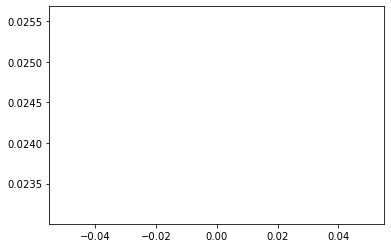

In [32]:
plt.plot(loss_history)
plt.show()

In [33]:
# model_origin = Autoencoder().to(device)
# model_origin.load_state_dict(torch.load("cifar10.pt"))
model_origin.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  )
)

In [34]:
def visualization_CIFAR10(img_array, caption, num=10):

    n = num
    plt.figure(figsize=(20, 6))

    for i in range(n):
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        img = img_array[i].swapaxes(0,1)
        img = img.swapaxes(1,2)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.figtext(0.5,0.4, str(caption), ha="center", va="top", fontsize=14)
#     plt.subplots_adjust(hspace = 0.1 )
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

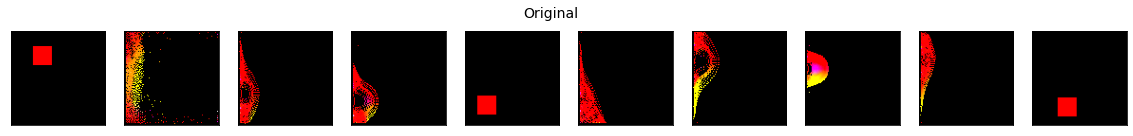

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([128, 3, 100, 100])


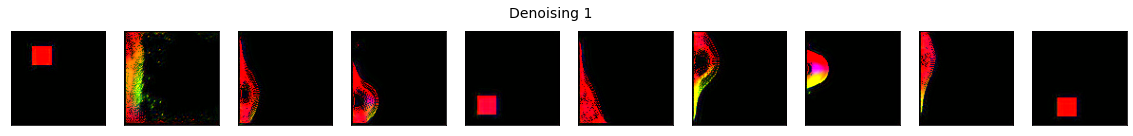

In [35]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images = images.permute(0, 3, 1, 2)
visualization_CIFAR10(images, caption="Original")

print(images.size())
# # add noise to the test images
# noisy_imgs = images + 0.1 * torch.randn(*images.shape)
# noisy_imgs = np.clip(noisy_imgs, 0., 1.)
# visualization_CIFAR10(noisy_imgs, caption="Noisy")

# get sample outputs
_, output = model_origin(images.cuda())
# output is resized into a batch of iages
output = output.view(batch_size, 3, 100, 100)
# use detach when it's an output that requires_grad
output = output.detach().cpu()
visualization_CIFAR10(output, caption="Denoising 1")

In [36]:
def StepTest(selected_model, noisy_imgs, steps = 10, holdon = True):
    visualization_CIFAR10(images, caption="Original")
    visualization_CIFAR10(noisy_imgs, caption="Noisy")

    for iii in range(steps):
        if iii>0:
            noisy_imgs = output
        # get sample outputs
        _, output = selected_model(noisy_imgs.cuda())
        # output is resized into a batch of iages
        output = output.view(batch_size, 3, 100, 100)
        # use detach when it's an output that requires_grad
        output = output.detach().cpu()
        visualization_CIFAR10(output, caption="Denoising "+str(iii+1) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

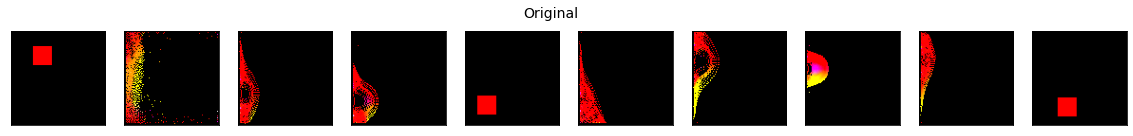

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

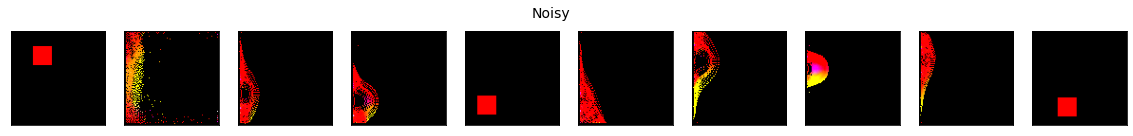

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

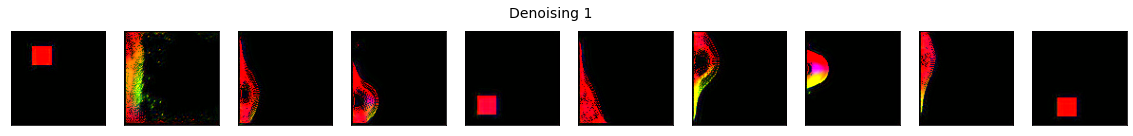

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

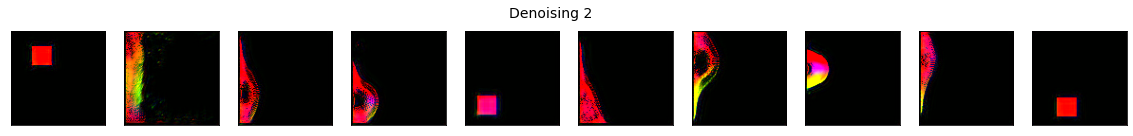

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

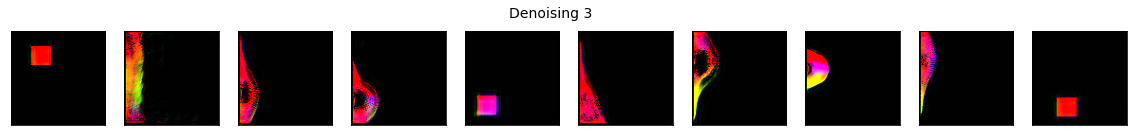

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

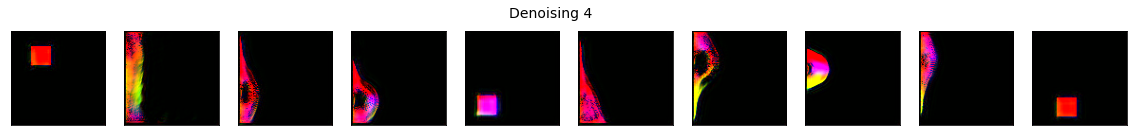

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

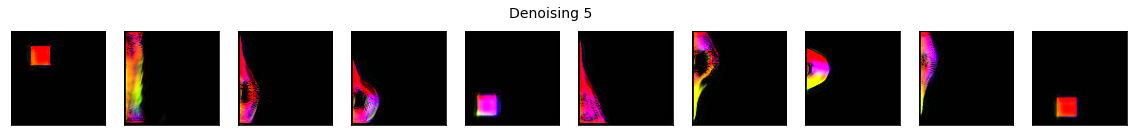

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

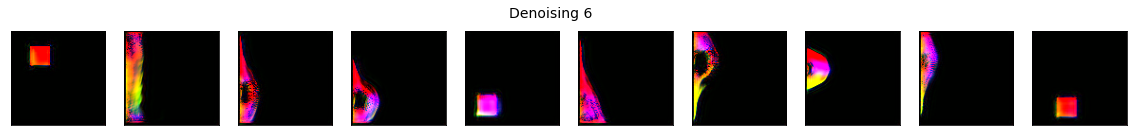

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

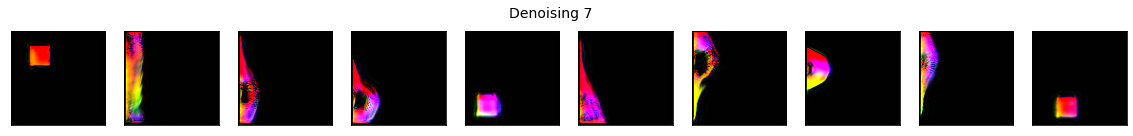

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

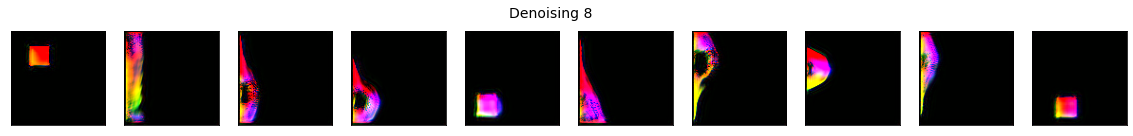

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

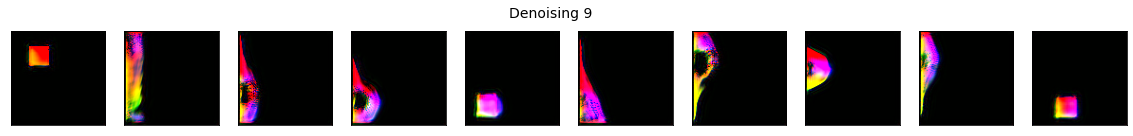

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

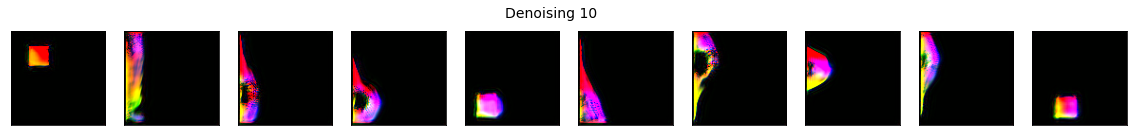

In [37]:
StepTest(model_origin, images, holdon=False, steps = 10)

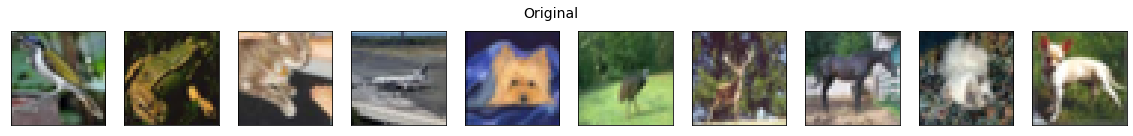

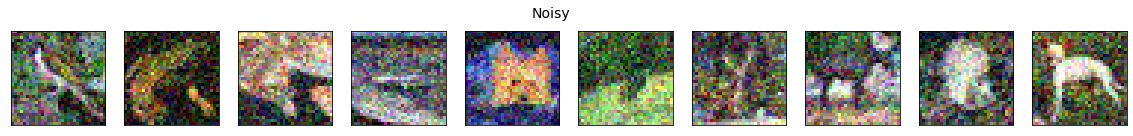

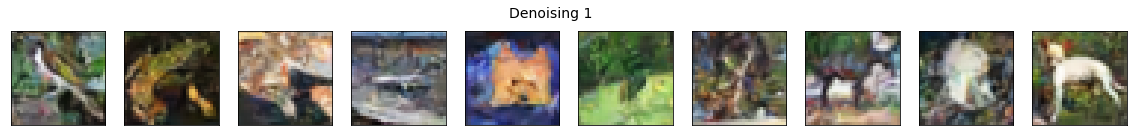

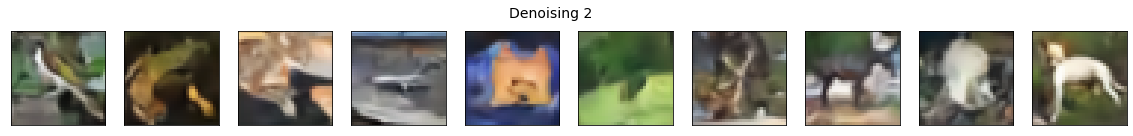

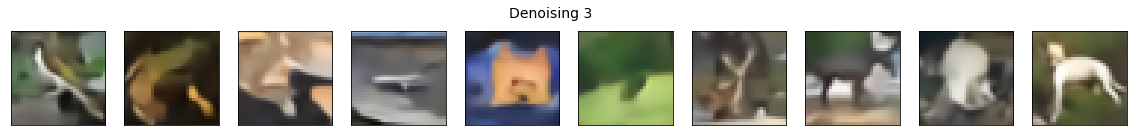

In [64]:
StepTest(model_origin, noisy_imgs, steps = 3)

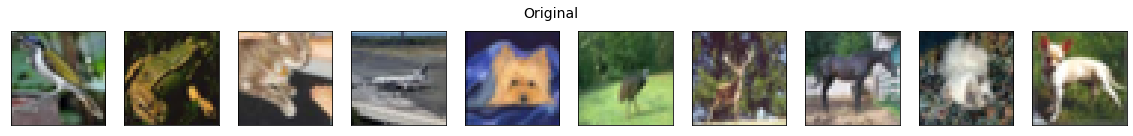

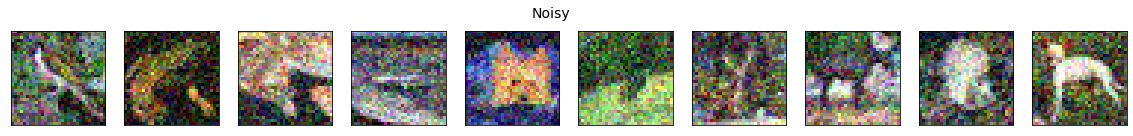

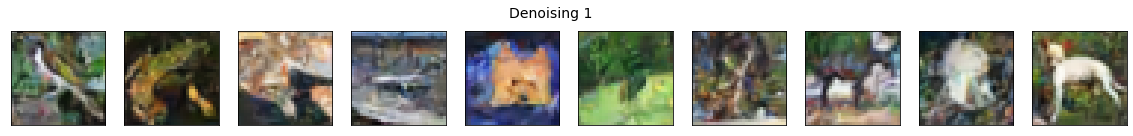

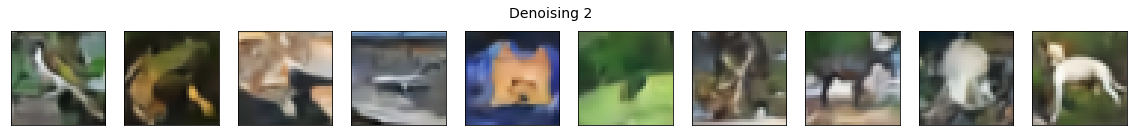

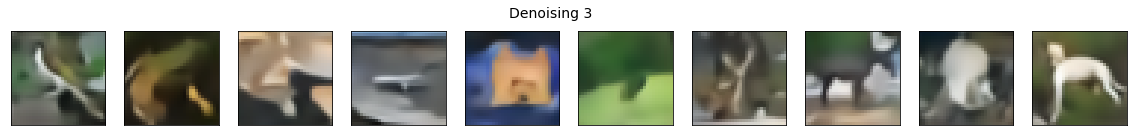

In [65]:
StepTest(model_double, noisy_imgs, steps = 3)

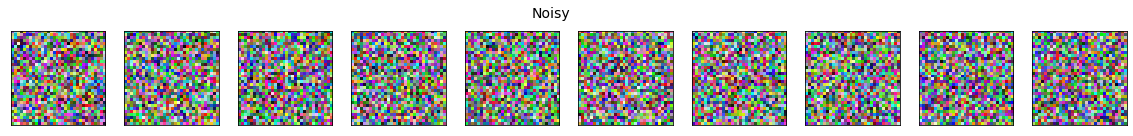

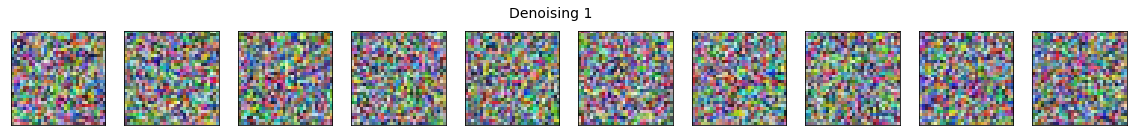

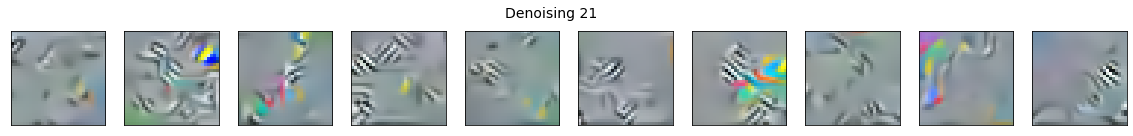

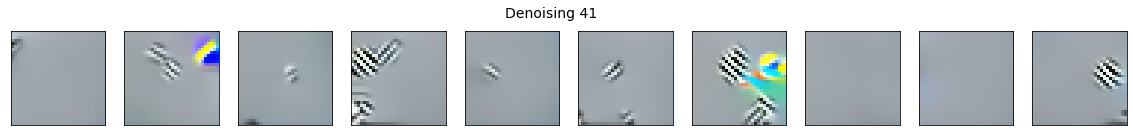

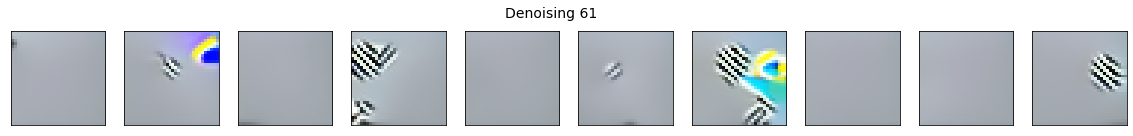

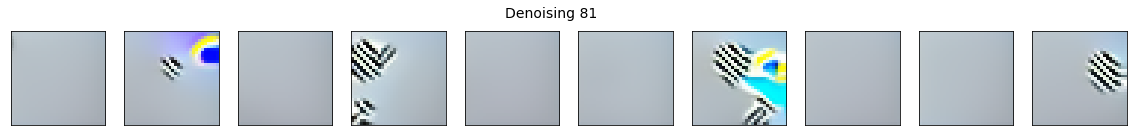

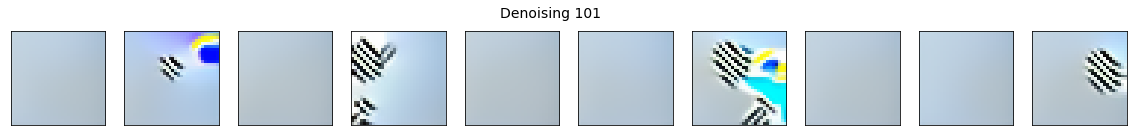

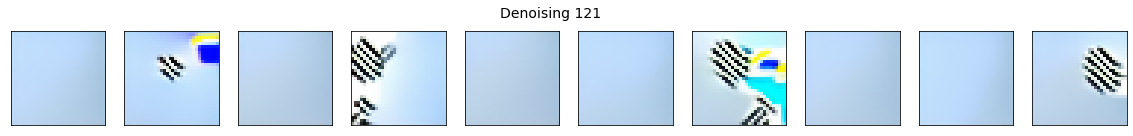

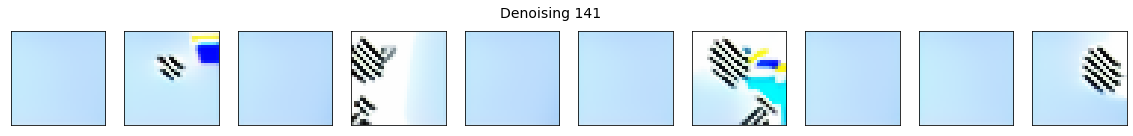

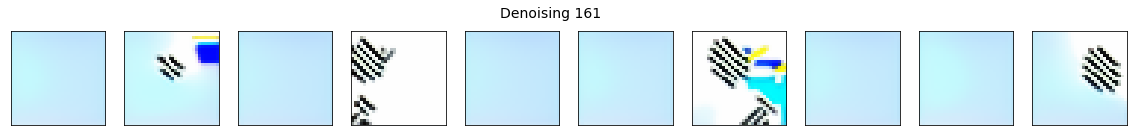

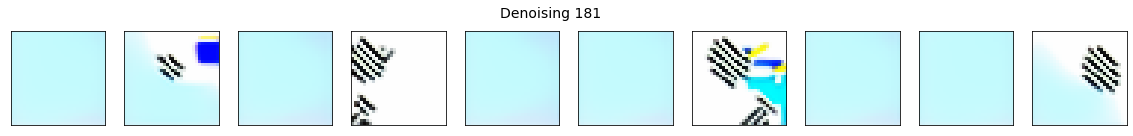

In [17]:
x_random = torch.rand(32,3,32,32)
def skipStepTest(selected_model, noisy_imgs, steps = 10, skip=10, holdon = True):
    visualization_CIFAR10(noisy_imgs, caption="Noisy")

    for iii in range(steps):
        if iii>0:
            noisy_imgs = output
        # get sample outputs
        _, output = selected_model(noisy_imgs.cuda())
        # output is resized into a batch of iages
        output = output.view(batch_size, 3, 32, 32)
        # use detach when it's an output that requires_grad
        output = output.detach().cpu()
        if iii%skip==0:
            visualization_CIFAR10(output, caption="Denoising "+str(iii+1) )
skipStepTest(model_half, x_random, steps = 200, skip = 20)

In [46]:
model_tooLarge = Autoencoder().to(device)
optimizer = torch.optim.Adam(model_tooLarge.parameters(), lr=0.001)

for epoch in range(1, epochs+1):
    loss = train(model=model_tooLarge, train_loader=train_loader_CIFAR10, train_noise_level=0.3)
    loss_history.append(loss)
    print("[Epoch {}] loss:{}".format(epoch, loss))
torch.save(model_half.state_dict(), "cifar10_tooLarge.pt")
model_tooLarge.eval()

[Epoch 1] loss:0.00813893191021839
[Epoch 2] loss:0.00624538688388339
[Epoch 3] loss:0.006080632502009338
[Epoch 4] loss:0.005977503818317399
[Epoch 5] loss:0.005916052095720727
[Epoch 6] loss:0.005864542087877285
[Epoch 7] loss:0.005836330958411469
[Epoch 8] loss:0.005808362217711777
[Epoch 9] loss:0.005787636953932177
[Epoch 10] loss:0.005764593167071989
[Epoch 11] loss:0.005737404308626839
[Epoch 12] loss:0.0057221734243840154
[Epoch 13] loss:0.005713392427442589
[Epoch 14] loss:0.0057005749119210915
[Epoch 15] loss:0.005681979710978628
[Epoch 16] loss:0.0056717849267445275
[Epoch 17] loss:0.005655621661687233
[Epoch 18] loss:0.005645839189985434
[Epoch 19] loss:0.005636521647562126
[Epoch 20] loss:0.005625403640220944


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Sigmoid()
  )
)

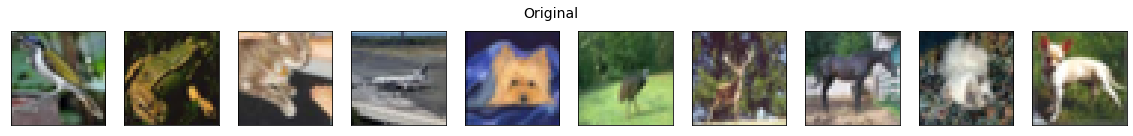

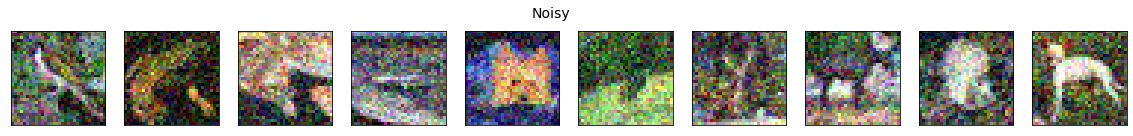

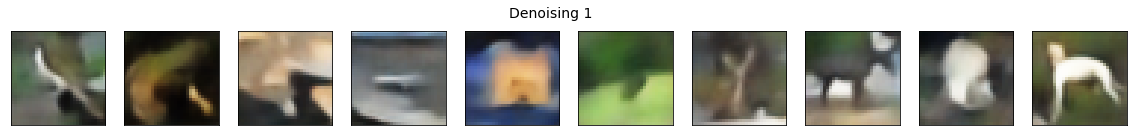

In [58]:
StepTest(model_tooLarge, noisy_imgs, steps=1)

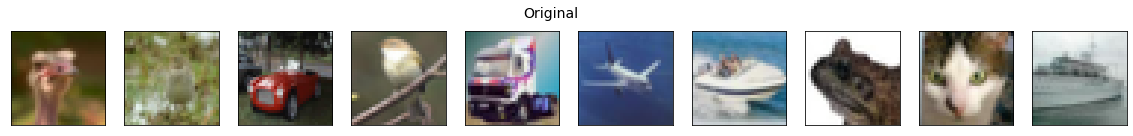

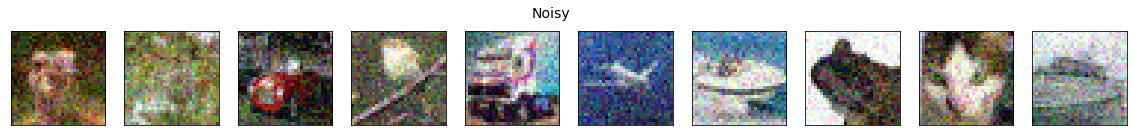

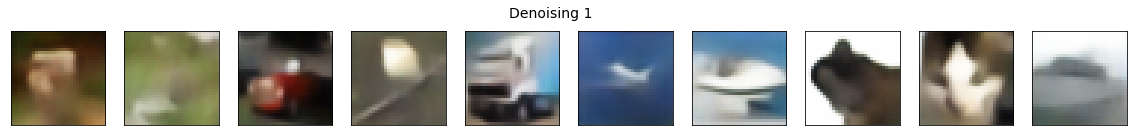

In [52]:
test_loader_CIFAR10 = torch.utils.data.DataLoader(
    dataset     = testset_CIFAR10,
    batch_size  = batch_size,
    shuffle     = True,
    num_workers = 2
)

dataiter = iter(test_loader_CIFAR10)
images, labels = dataiter.next()
visualization_CIFAR10(images, caption="Original")

# add noise to the test images
noisy_imgs = images + 0.1 * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)
visualization_CIFAR10(noisy_imgs, caption="Noisy")

# get sample outputs
_, output = model_tooLarge(noisy_imgs.cuda())
# output is resized into a batch of iages
output = output.view(batch_size, 3, 32, 32)
# use detach when it's an output that requires_grad
output = output.detach().cpu()
visualization_CIFAR10(output, caption="Denoising 1")

In [12]:
model_tooLarge = Autoencoder().to(device)
model_tooLarge.load_state_dict(torch.load("cifar10_tooLarge.pt"))
model_tooLarge.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Sigmoid()
  )
)

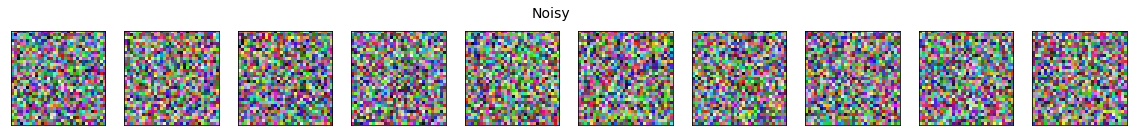

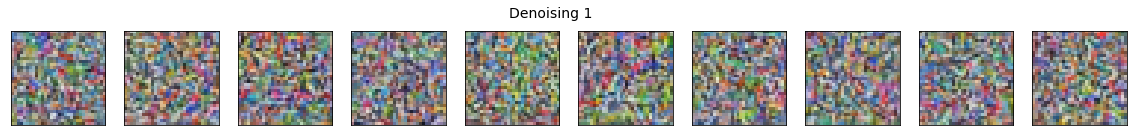

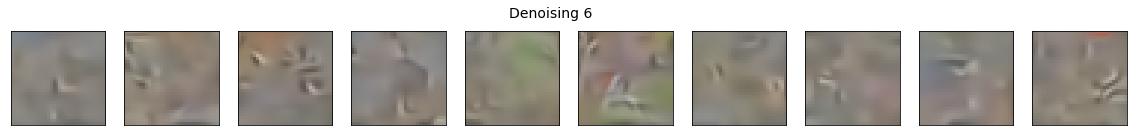

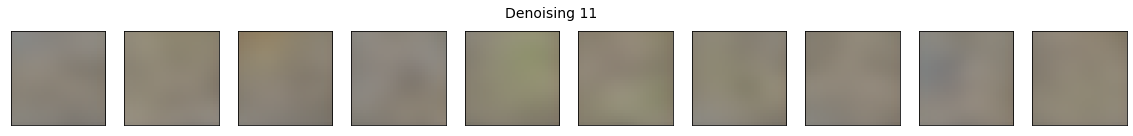

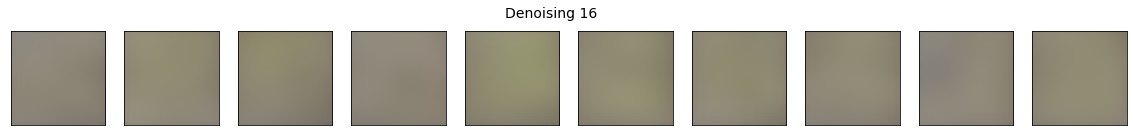

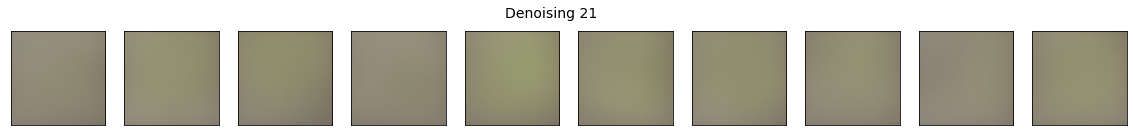

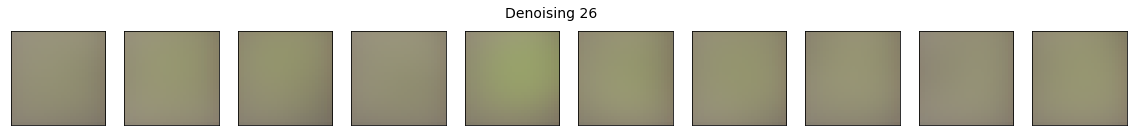

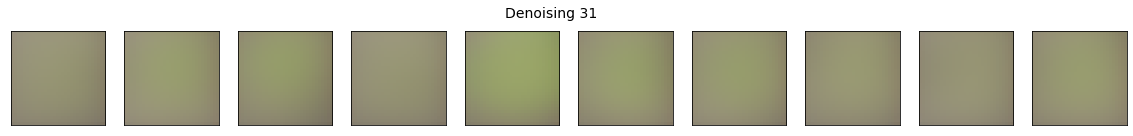

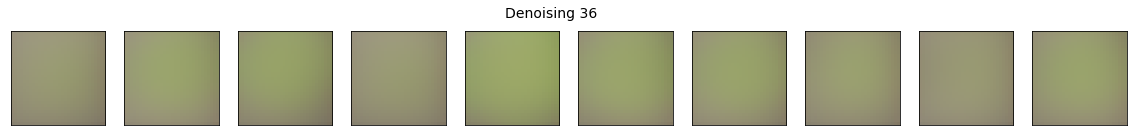

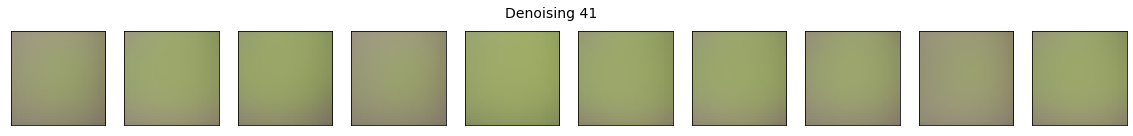

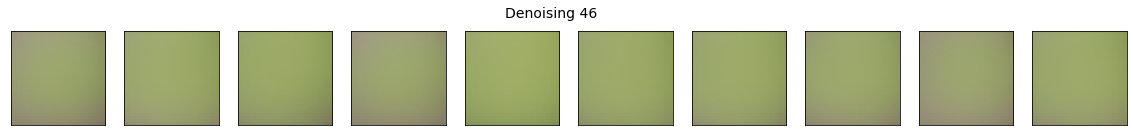

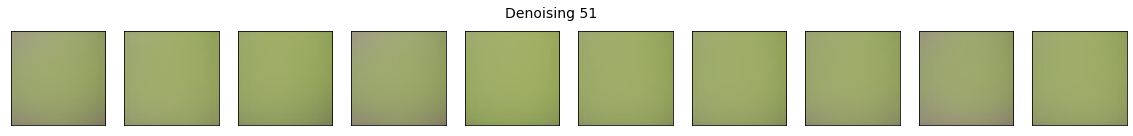

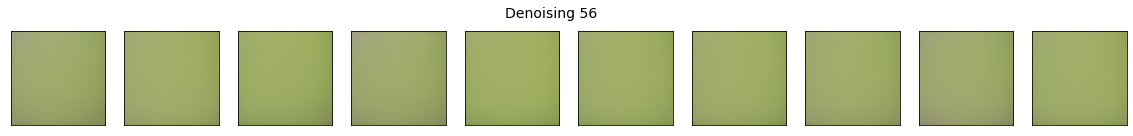

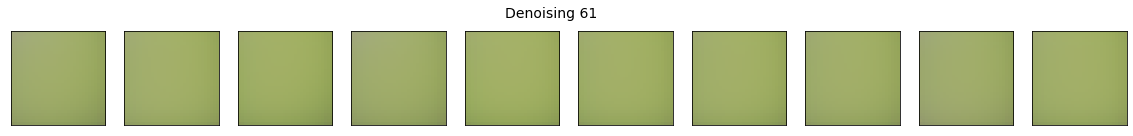

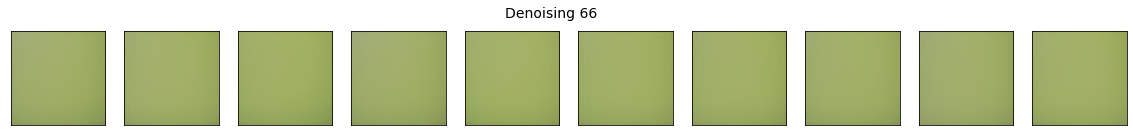

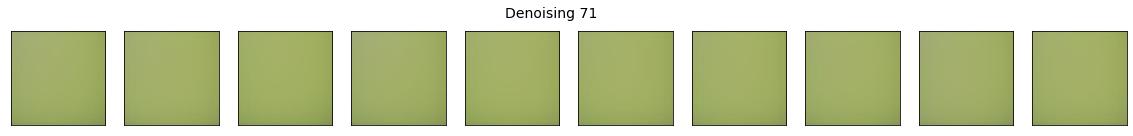

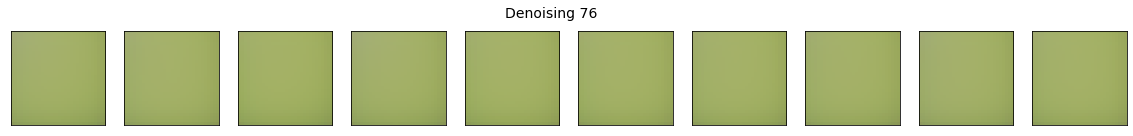

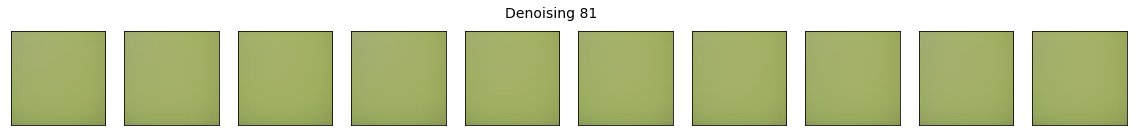

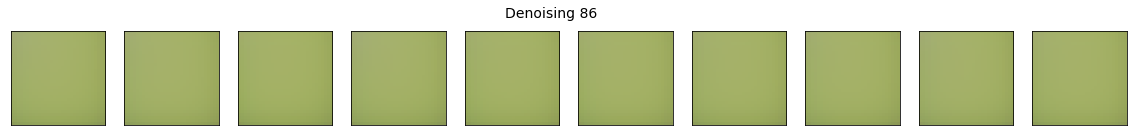

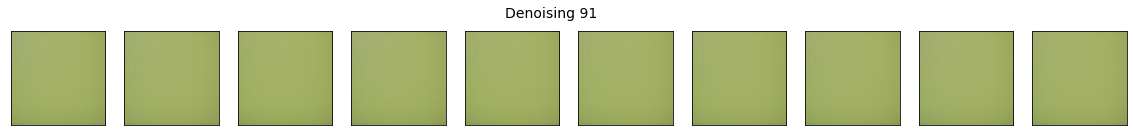

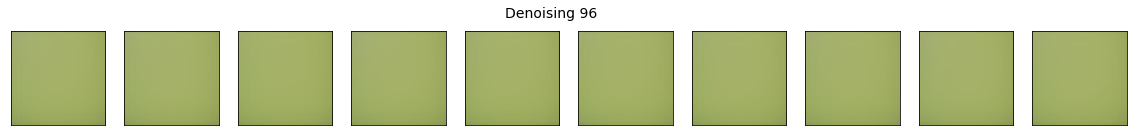

In [16]:
x_random = torch.rand(32,3,32,32)
def skipStepTest(selected_model, noisy_imgs, steps = 10, skip=10, holdon = True):
    visualization_CIFAR10(noisy_imgs, caption="Noisy")

    for iii in range(steps):
        if iii>0:
            noisy_imgs = output
        # get sample outputs
        _, output = selected_model(noisy_imgs.cuda())
        # output is resized into a batch of iages
        output = output.view(batch_size, 3, 32, 32)
        # use detach when it's an output that requires_grad
        output = output.detach().cpu()
        if iii%skip==0:
            visualization_CIFAR10(output, caption="Denoising "+str(iii+1) )
skipStepTest(model_origin, x_random, steps = 100, skip = 5)